# Machine Learning for data analysis

## Topic : Decision tree (Classification Tree)

Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. 
Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.


### Run a Classification Tree.
You will need to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.


### What to submit:

Following completion of the steps described above, create a blog entry where you submit syntax used to run a Classification Tree (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. Please note that your reviewers should NOT be required to download any files in order to complete the review

_______________________________________________________________________________________________________________________________

### Data Set : Pima Indians Diabetes Database

#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Target variable: 
- label (0= No diabetes, 1=Got diabetes)

Predictor variables:
- pregnant (Number of times pregnant)
- glucose (glucose concentration a 2 hours in an oral glucose tolerance test)
- bp (blood pressure (mm Hg))
- skin (Triceps skin fold thickness (mm))
- insulin (2-Hour serum insulin (mu U/ml))
- bmi (Body mass index (weight in kg/(height in m)^2))
- pedigree (Diabetes) pedigree function
- age (in years)

#### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [1]:
#Import useful libraries 
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import warnings # ignore warning message
warnings.filterwarnings('ignore')


### 1. Load Data 

In [2]:
# load dataset
data = pd.read_csv("diabetes.csv")

In [3]:
#rename columns 
data.columns=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [4]:
data.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 2. Data Summary 

In [5]:
#check data type of each columns in the date frame 
#create a function to check the data type of columns
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))
        
print_categories(data)

pregnant :  Numerical
glucose :  Numerical
bp :  Numerical
skin :  Numerical
insulin :  Numerical
bmi :  Numerical
pedigree :  Numerical
age :  Numerical
label :  Numerical


In [6]:
#descriptive analysis of data 
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#size of the dataframe
data.shape

(768, 9)

In [8]:
#check whether the data clean have any null; if null exist with small portion compared to population use .dropna()
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [9]:
#Proportion of diabetes patient in the given sample data set
data['label'].value_counts()/data['label'].value_counts().sum()

0    0.651042
1    0.348958
Name: label, dtype: float64

In [10]:
pd.crosstab(data['label'],data['pregnant'])

pregnant,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
label,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


### 3. Split data into train;test 

In [50]:
#Declare target and predictors variables
predictors = data[['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']]
target = data.label

#split data using 'train_test_split' function and set the size ratio (60%:40%)
pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, target, test_size=.4, random_state=0)

In [51]:
pred_train.shape

(460, 8)

In [52]:
pred_test.shape

(308, 8)

In [53]:
tar_train.shape

(460,)

In [54]:
tar_test.shape

(308,)

### 4. Modeling and prediction 

In [55]:
#Build Decision tree model by fitting training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

#predict using test predictors
predictions=classifier.predict(pred_test)

### 5. Evaluating decision tree model 

In [56]:
#confusion matrix table 
def confusionTable(predictedY,realY):
    '''
    predictedY: predicted Y with binary value: 0 or 1
    realY: real Y with binary valye :0 or 1
    '''
    confusion_train=pd.crosstab(predictedY, realY)
    PPV=confusion_train.iloc[1,1]/(confusion_train.iloc[1,1]+confusion_train.iloc[1,0])
    NPV=confusion_train.iloc[0,0]/(confusion_train.iloc[0,0]+confusion_train.iloc[0,1])
    accuracy=(confusion_train.iloc[1,1]+confusion_train.iloc[0,0])/(confusion_train.iloc[0,0]+confusion_train.iloc[0,1]+confusion_train.iloc[1,1]+confusion_train.iloc[1,0])
    confusion_train['PV']=[NPV,PPV]
    specificity=confusion_train.iloc[0,0]/(confusion_train.iloc[1,0]+confusion_train.iloc[0,0])
    sensitivity=confusion_train.iloc[1,1]/(confusion_train.iloc[1,1]+confusion_train.iloc[0,1])
    confusion_train.loc['SS']=[specificity, sensitivity,accuracy]
    return confusion_train

In [57]:
confusionTable(tar_test, predictions)

col_0,0,1,PV
label,,,
0,158.000000,47.000000,0.770732
1,49.000000,54.000000,0.524272
SS,0.763285,0.534653,0.688312


### 6. Visualizing decision tree

In [58]:
predictors_names =['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
target_name='label'

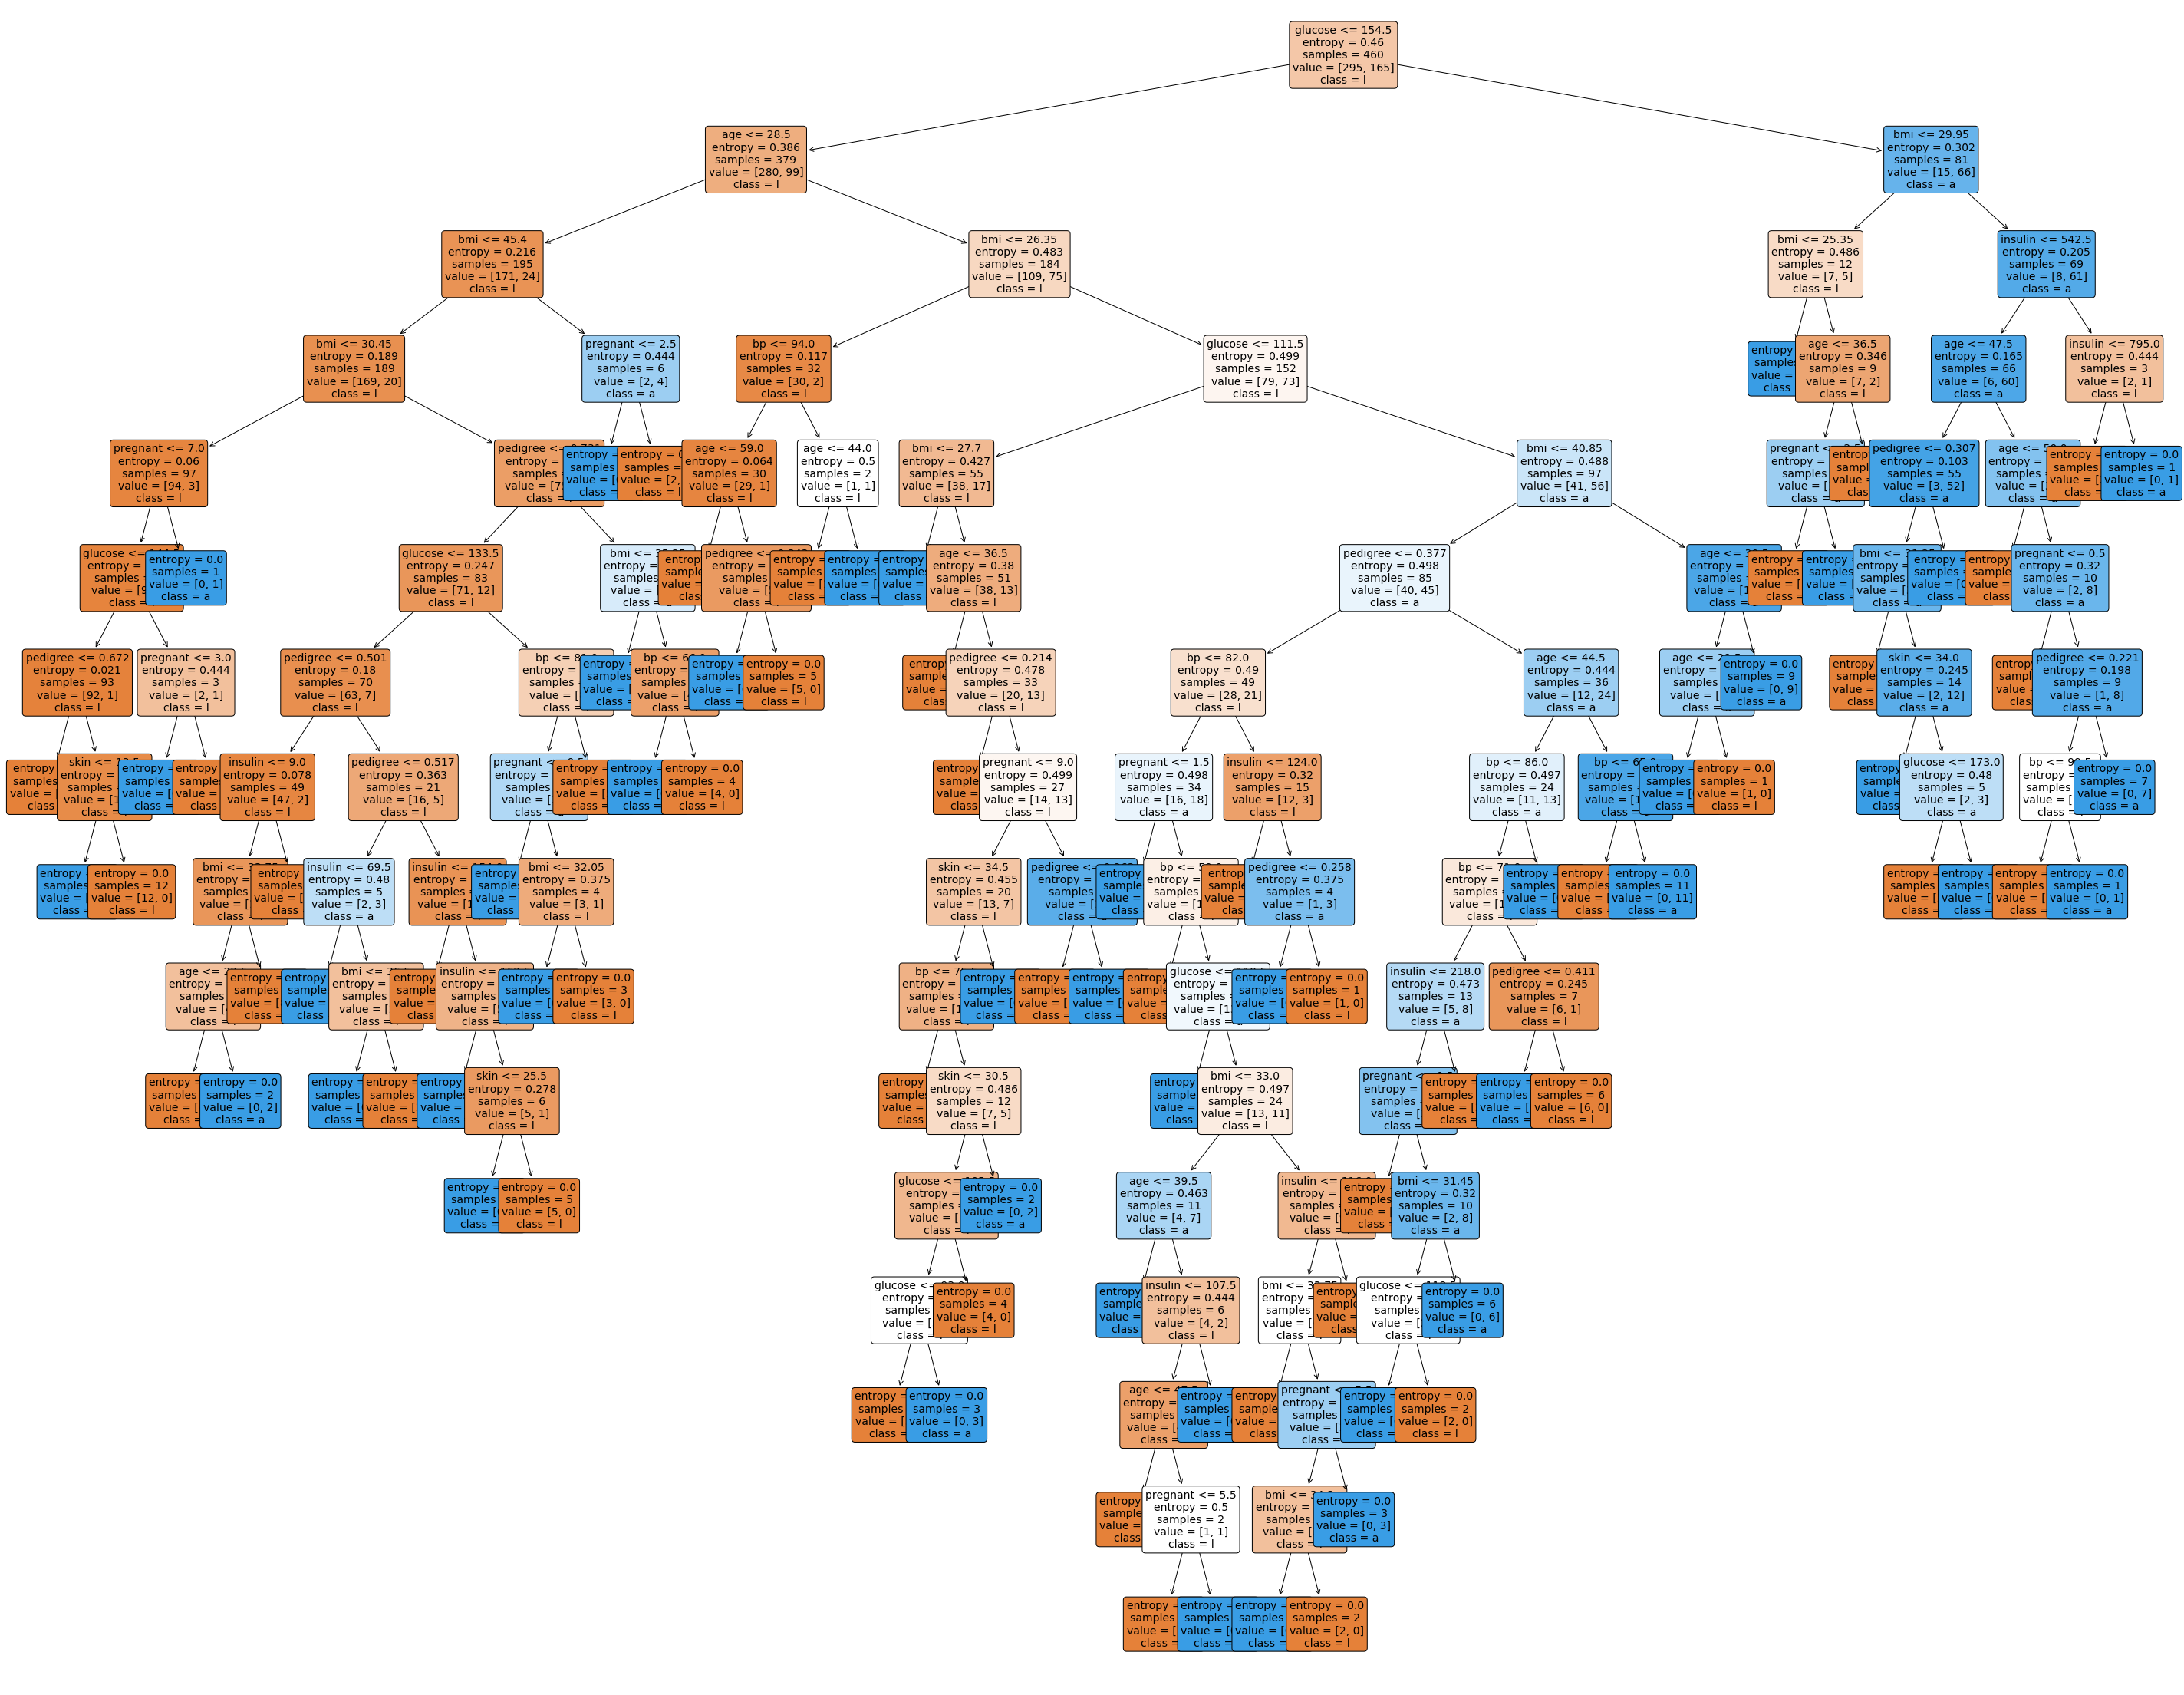

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
a = plot_tree(classifier, 
              feature_names=predictors_names,class_names=target_name, 
              filled=True, 
              rounded=True, 
              fontsize=14)

The decision tree analysis was performed to test non-linear relationships among the explanatory variables and a single binary, categorical response variable. The training sample has 460 rows of data and 8 explanatory variables; the testing sample has 308 rows of data, and the same 8 explanatory variables. 

From the decision tree graph, it is apparent that 'glucose' level is the first features that separate the sample into two subgroups with a cut-off value at 130.5. The tree is growing further by slipting down using "age", "BMI", "pregnant","BP" and so on. While moving towards the bottom of the tree, the entropy result of each child note decrease gradually and reaches 0 (zero impurity) at the terminal node.

*the figures need to update everytime we rerun the code:
The decision tree results in 158 true positives; 57 true negatives; 41 false positive; 52 false negative while 
- accuracy score is 0.698052 (around 69.8%)
- specificity score is 0.752381 (around 75.2%)
- sensitivity score is 0.581633 (around 58.2%)

### 7. Optimize decision tree

In [60]:
#New Model
#Build Decision tree model by fitting training data
classifier1=DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 4,  min_samples_split = 5,min_samples_leaf = 2, max_features = 2)
classifier1=classifier1.fit(pred_train,tar_train)

#predict using test predictors
predictions=classifier1.predict(pred_test)

#evaluate new model
confusionTable(tar_test, predictions)

col_0,0,1,PV
label,,,
0,191.000000,14.000000,0.931707
1,78.000000,25.000000,0.242718
SS,0.710037,0.641026,0.701299


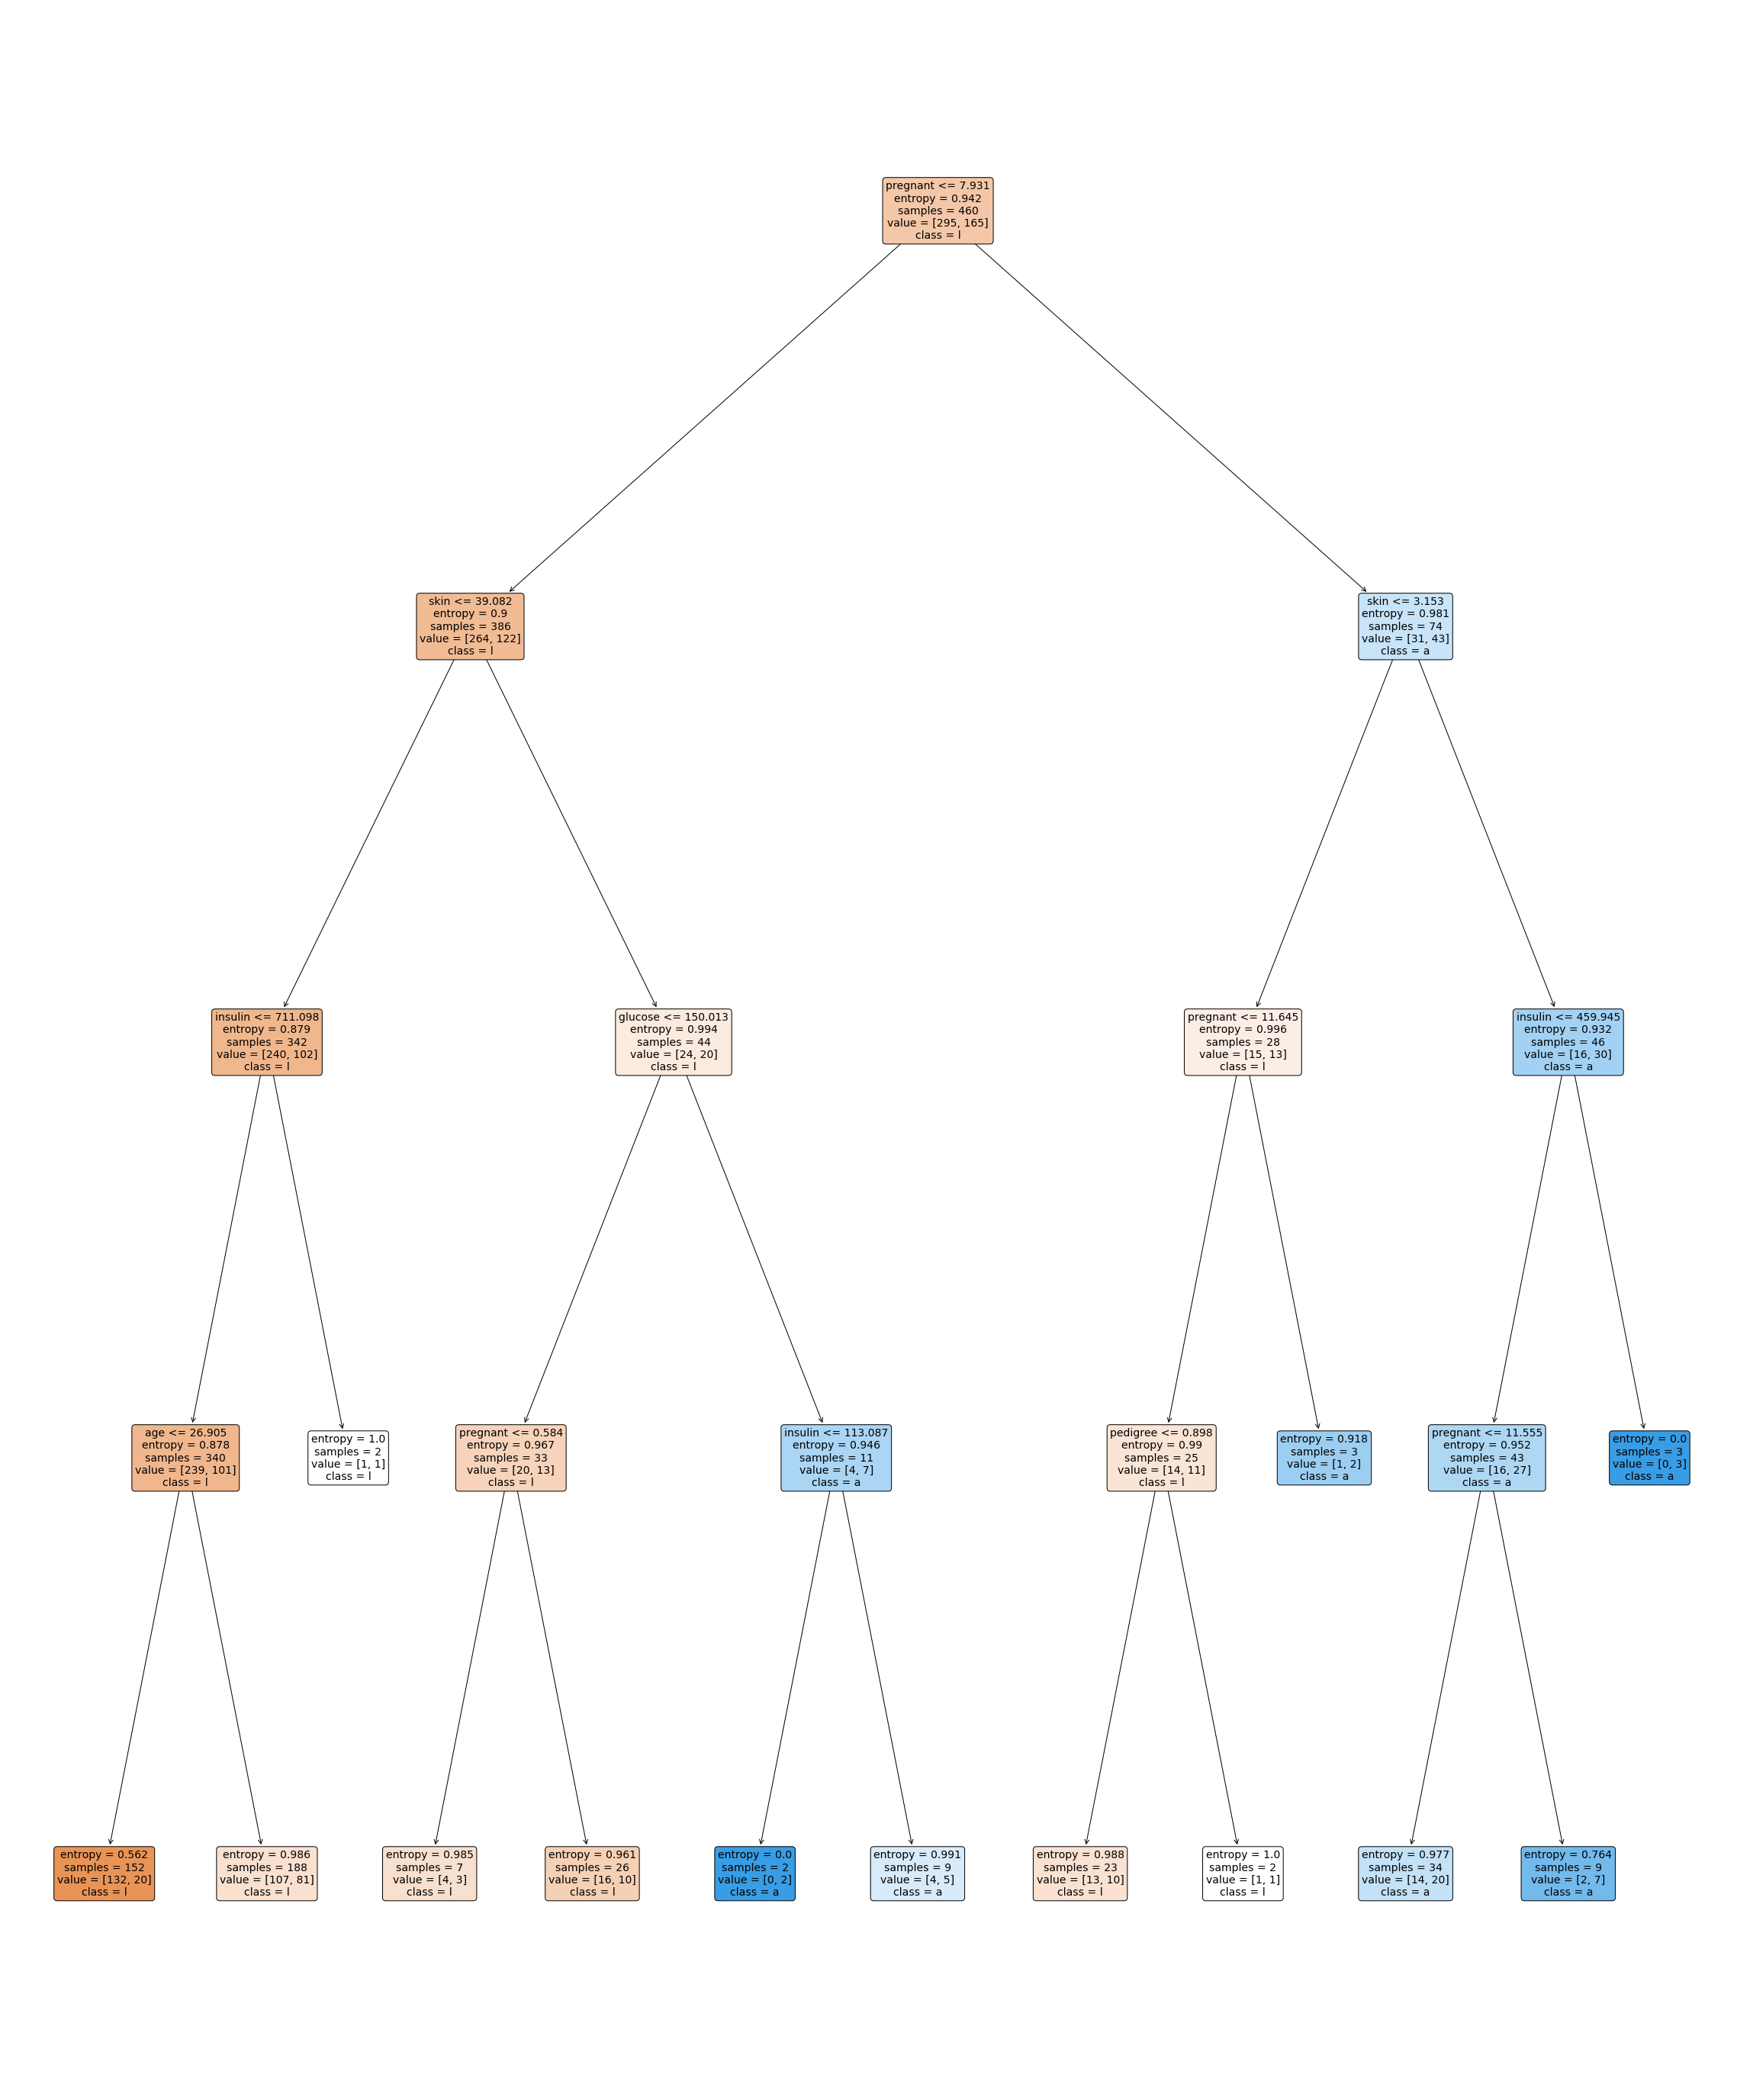

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,50))
a = plot_tree(classifier1, 
              feature_names=predictors_names,class_names=target_name, 
              filled=True, 
              rounded=True, 
              fontsize=14)

resource:
https://towardsdatascience.com/machine-learning-basics-descision-tree-from-scratch-part-ii-dee664d46831